### import astrokit

In [21]:
import sys

# set path where astrokit is located on your device
path_astrokit = '/home/slawa/Dropbox/Projects/scripts/python/'

sys.path.append(path_astrokit)

#import astrokit
import astrokit

### load example data

In [22]:
from astropy.io import fits

# path of example data
input_path = '/media/slawa/Barracuda/Astrodata/astrokit_data/'

# file name
input_file = 'sofia_s279_cii_mb_21_asec_vres_300_ms_Tmb_cube.fits'

hdul = fits.open(input_path + input_file)

###  get_axis()

the function "get_axis(axis, hdul)" determine the axis values from the
fits-header of a given spectral cube

function input:

axis: spectral cube axes:

            1 --> first spatial axis, right ascension (RA) in [deg]
            2 --> second spatical axis, declination (DEC) in [deg]
            3 --> velocity/frequency axis in [m/s]/[Hz]

hdul: input spectral cube

In [23]:
# determine ra-axis in [deg]
axis = 1
axis_ra = astrokit.get_axis(axis, hdul)

# determine dec-axis in [dec] 
axis = 2
axis_ra = astrokit.get_axis(axis, hdul)

# determine velocity-axis in [m/s]
axis = 3
axis_vel = astrokit.get_axis(axis, hdul)

# transform velocity axis from [m/s] to [km/s]
axis_vel = axis_vel/1.0e3

### momemt_N()

the function "moment_N(order, hdul, noise_level)" determines the moment of order N

function input:

    order: the order of the moment
    hdul: the spectral cube
    the integrated noise level of the spectral cube (only important for N>0, the default value is set to 1e-6)

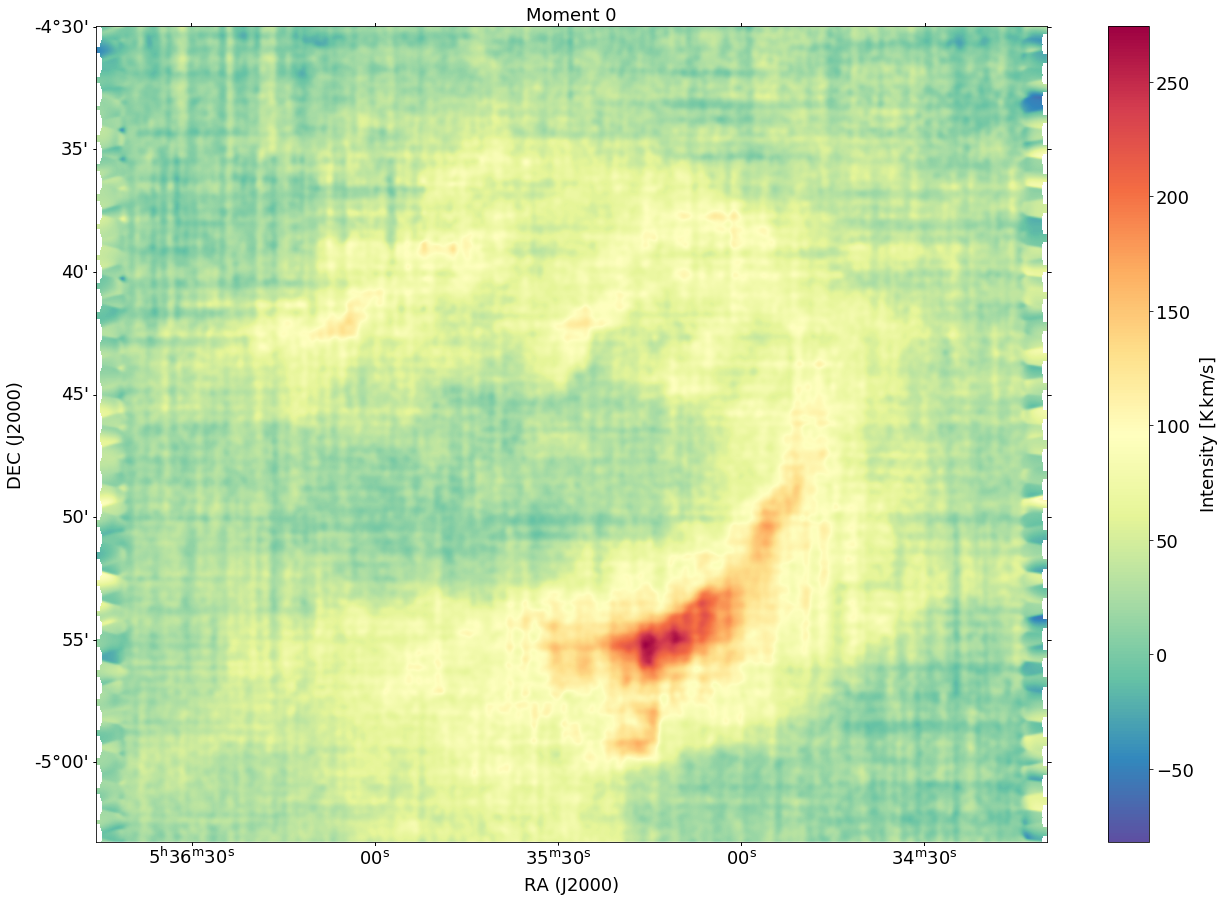

In [39]:
order = 0
moment_0 = astrokit.moment_N(order, hdul)


# plot moment_0

from astropy.wcs import WCS
import matplotlib.pyplot as plt
%matplotlib inline

fontsize=18

wcs = WCS(moment_0[0].header)

fig = plt.figure(figsize=(22, 15))
plt.subplot(projection=wcs)
cax=plt.imshow(moment_0[0].data, origin='lower',
               cmap='Spectral_r', interpolation='gaussian')
cbar=plt.colorbar(cax)
plt.xlabel('RA (J2000)',fontsize=fontsize)
plt.ylabel('DEC (J2000)',fontsize=fontsize)
plt.title('Moment '+str(order),fontsize=fontsize)
cbar.set_label('Intensity [K$\,$km/s]',size=fontsize)
cbar.ax.tick_params(labelsize=fontsize) 
plt.rc('xtick', labelsize = fontsize) 
plt.rc('ytick', labelsize = fontsize) 